In [1]:
import os
import scanpy
import physiopy

In [2]:
# Download test files
if not os.path.isfile('BadhuriSubsampled10k.h5ad'):
    !wget https://www.dropbox.com/s/nm08dboajyl20u4/BadhuriSubsampled10k.h5ad
if not os.path.isfile('BadhuriSubsampled100.h5ad'):
    !wget https://www.dropbox.com/s/at7jkhm2gttvdzn/BadhuriSubsampled100.h5ad

In [3]:
# Read Badhuri data

adata_src = scanpy.read('BadhuriSubsampled10k.h5ad')
adata_trgt = scanpy.read('BadhuriSubsampled100.h5ad')

# adata_src = scanpy.read('/Users/stumpf/Documents/Projects/Patrick Stumpf/DeepCell/data/Badhuri/expression_matrix.h5ad')

# subsample data to contain ~10 000 cells
# adata_src = scanpy.pp.subsample(adata_src, fraction=.05, copy=True)
# scanpy.write(adata=adata_src, filename='BadhuriSubsampled10k.h5ad', ext='h5ad')

# target == 100 observations of source
# adata_trgt = scanpy.pp.subsample(adata_src, n_obs=100, copy=True)
# scanpy.write(adata=adata_trgt, filename='BadhuriSubsampled100.h5ad', ext='h5ad')

In [4]:
# scp.pp.calculate_qc_metrics(adata_src, inplace=True)
scanpy.tl.rank_genes_groups(adata_src, groupby='Type', method='t-test')

In [5]:
# groups = ('Endothelial', 'OPC', 'Mural', 'Excitatory_Neuron', 'Microglia', 'Radial_Glia', 'Inhibitory_Neuron')

score = physiopy.run(adata_src, adata_trgt, groupby='Type', groups=None, nFeatures=100, returnTestStatistic=False)


(1/3) Aligning feature space ... 
19765 common features could be matched.

(2/3) Calculating source physiospace ... 
Processing Radial_Glia
Processing IPC
Processing Excitatory_Neuron
Processing Mural
Processing Endothelial
Processing Red_blood_cells
Processing Outlier
Processing OPC
Processing Microglia
Processing Inhibitory_Neuron

(3/3) Annotating target cells ... 
Computing: [########################################] 100/100


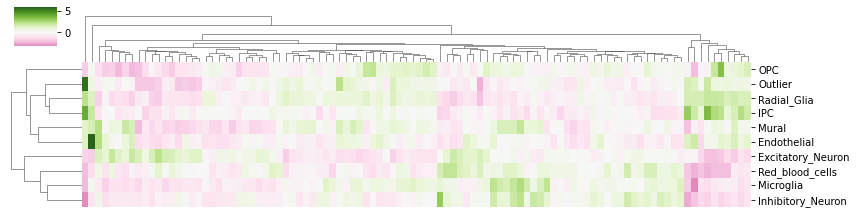

In [9]:
physiopy.viz(score.transpose(), z_score=0, standard_scale=None, center=0, cmap="PiYG", figsize=(12,3), dendrogram_ratio=(.1,.25), xticklabels=False)

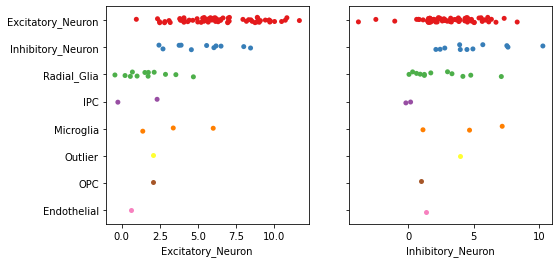

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(8, 4), sharey=True)

sns.stripplot(x=score['Excitatory_Neuron'],
              y=adata_trgt.obs['Type'].to_list(), dodge=True, palette='Set1', ax=axs[0]);
sns.stripplot(x=score['Inhibitory_Neuron'],
              y=adata_trgt.obs['Type'].to_list(), dodge=True, palette='Set1', ax=axs[1]);